## Adult income Data explore - Python3 kernel
#### Group members:
>Yingxue Zhu  (820894341)   Xuan Li  (819264580)

#### Goal of this notebook:
>Explore and visualizethe dataset, and then compare three different classification models.

#### Dataset:
>https://archive.ics.uci.edu/ml/datasets/adult 

>come with two csv files, which is already Splited into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

#### Organization

>* 1 Data cleaning & transformation
* 2 Data exploration & visualization
   * 2.1 Percentage of income >50k and <=50k
   * 2.2 Data Distribution 
   * 2.3 Heat map
   * 2.4 Top features vs. income.
* 3 Prediction:
   * 3.1 Logistic Regression
   * 3.2 Gradient Boost Classifier
   * 3.3 Neural Network Classifier
   * 3.4 Decision Tree Classifier
   * 3.5 Naive Bayes Classifier
   * 3.6 Random Forest Classifier
   * 3.7 Voting Classifier
* 4 Feature importance for Decision Tree & Random Forest
* 5 Model Comparison

### 1. Data cleaning and transformation

In [13]:
import pandas as pd # data processing, CSV file I/O 
import numpy as np # linear algebra
import os
cwd = os.getcwd()
train_path = cwd + "/adult.data"
test_path= cwd + "/adult.test"
newCols = ['age','workclass','fnlwgt','education','edu_number','marital_status','occupation','relationship','race','sex','capital_gain',
             'capital_loss','hours_per_week','native_country','income']
df_train = pd.read_csv(train_path, delim_whitespace=False, names=newCols, header=None)
df_test = pd.read_csv(test_path, delim_whitespace=False, names=newCols, header=None)

In [14]:
df_train = df_train[df_train["workclass"] != " ?"]
df_train = df_train[df_train["occupation"] != " ?"]
df_train = df_train[df_train["native_country"] != " ?"]
df_test = df_test[df_test["workclass"] != " ?"]
df_test = df_test[df_test["occupation"] != " ?"]
df_test = df_test[df_test["native_country"] != " ?"]

Now the data is clean, we will use label encoder technique for text columns transformation

In [15]:
category_col =['workclass', 'race', 'education','marital_status', 'occupation',
               'relationship', 'sex', 'native_country', 'income'] 
for col in category_col:
    a, b = np.unique(df_train[col], return_inverse=True)
    c, d = np.unique(df_test[col], return_inverse=True) 
    df_train[col] = b
    df_test[col] = d   

### 2. Data exploration & visualization

#### 2.1 Percentage of income >50k and <=50k

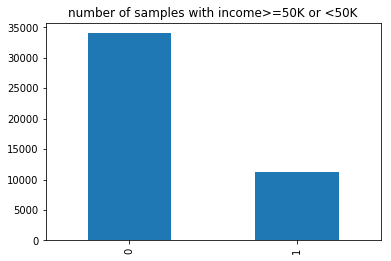

In [16]:
import matplotlib.pyplot as plt  # plot graph
import seaborn as sns  # plot interactive graph
%matplotlib inline
frames = [df_train, df_test]
data = pd.concat(frames)  # combine the training and testing data together
pc = data['income'].value_counts()
pc.plot(kind = 'bar',title = "number of samples with income>=50K or <50K")

#### 2.2 Data Distribution

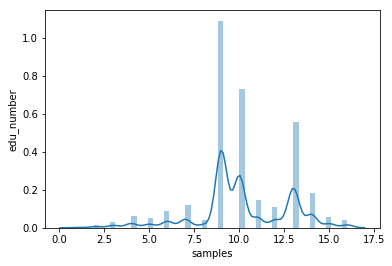

In [17]:
ax = sns.distplot(data['edu_number'])
ax.set(xlabel='samples', ylabel='edu_number')
plt.show()

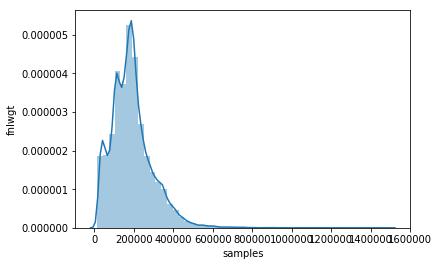

In [18]:
ax = sns.distplot(data['fnlwgt'])
ax.set(xlabel='samples', ylabel='fnlwgt')
plt.show()

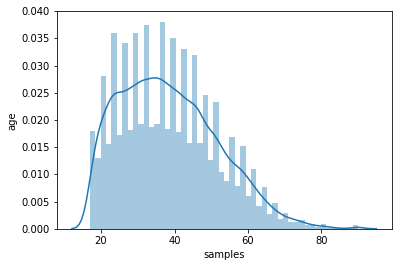

In [19]:
ax = sns.distplot(data['age'])
ax.set(xlabel='samples', ylabel='age')
plt.show()

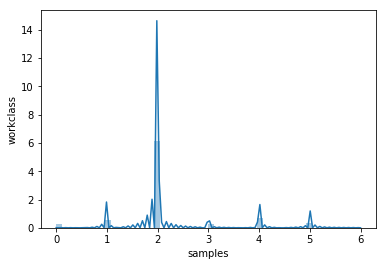

In [20]:
ax = sns.distplot(data['workclass'])
ax.set(xlabel='samples', ylabel='workclass')
plt.show()

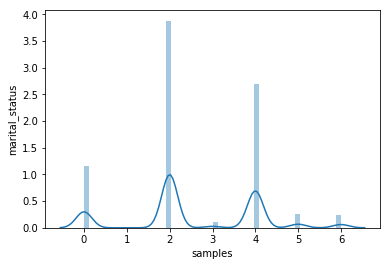

In [21]:
ax = sns.distplot(data['marital_status'])
ax.set(xlabel='samples', ylabel='marital_status')
plt.show()

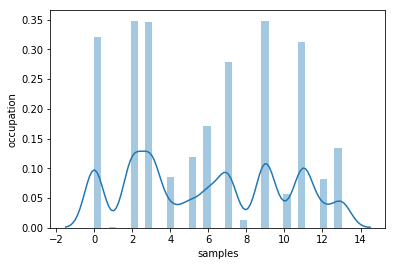

In [22]:
ax = sns.distplot(data['occupation'])
ax.set(xlabel='samples', ylabel='occupation')
plt.show()

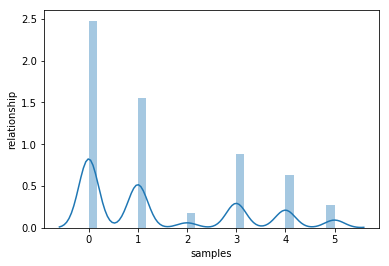

In [23]:
ax = sns.distplot(data['relationship'])
ax.set(xlabel='samples', ylabel='relationship')
plt.show()

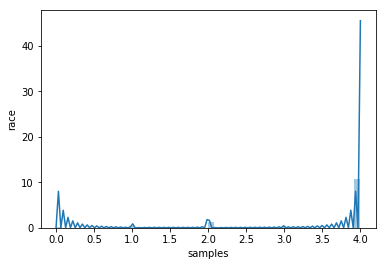

In [24]:
ax = sns.distplot(data['race'])
ax.set(xlabel='samples', ylabel='race')
plt.show()

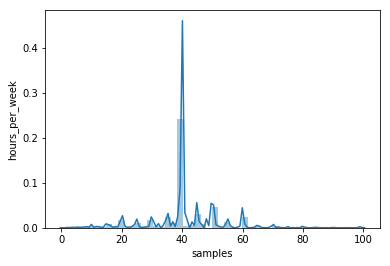

In [25]:
ax = sns.distplot(data['hours_per_week'])
ax.set(xlabel='samples', ylabel='hours_per_week')
plt.show()

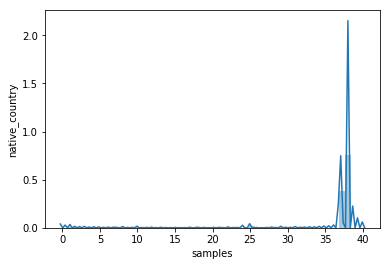

In [26]:
ax = sns.distplot(data['native_country'])
ax.set(xlabel='samples', ylabel='native_country')
plt.show()

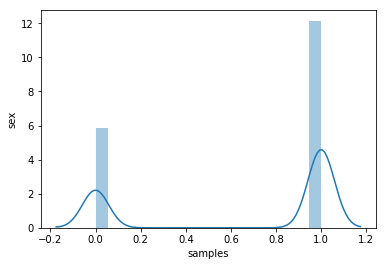

In [27]:
ax = sns.distplot(data['sex'])
ax.set(xlabel='samples', ylabel='sex')
plt.show()

From the above distribution graphs for 13 features, we can see all the features is normally distributed except for **race and native country**. 

#### 2.3 Heat map

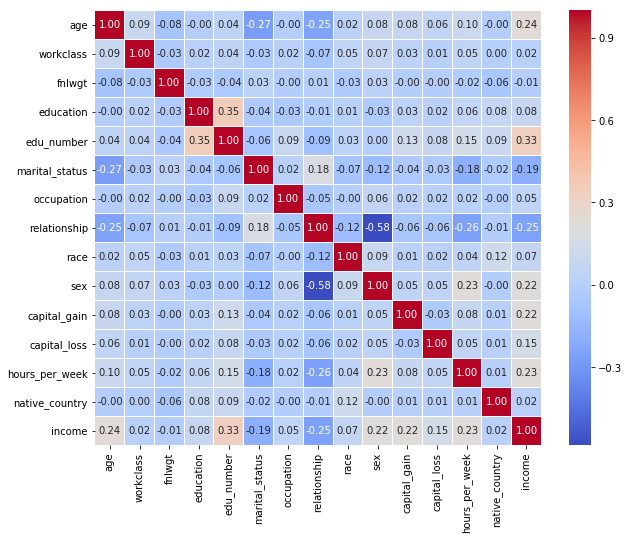

In [28]:
plt.figure(figsize = (10,8))
g = sns.heatmap(data=data.corr(),annot=True,fmt = ".2f", cmap = "coolwarm",linewidths= 0.01)

From the heat map, we can see edu_number and age have strongest correlation to income, among them, edu_number and education has strongest correlation. 

#### 3.4 Top features vs. income

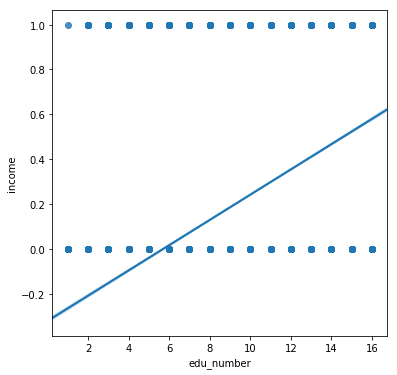

In [29]:
# edu_number and income
plt.figure(figsize = (6,6))
sns.regplot(x="edu_number", y="income", data=data);

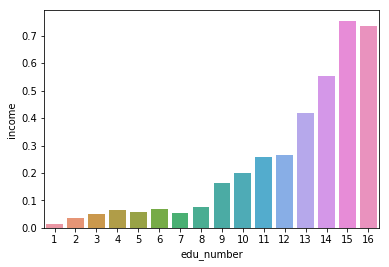

In [30]:
# edu_number and income
sns.barplot(data['edu_number'],data['income'],ci=None)

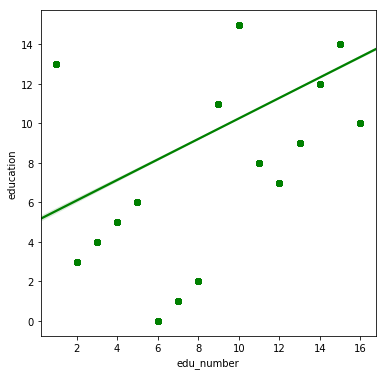

In [31]:
# edu_number and education
plt.figure(figsize = (6,6))
sns.regplot(x="edu_number", y="education", data=data,  color = 'Green');

Above three charts shows more edu_number more income, more edu_cation higher education, just as heat map suggested.

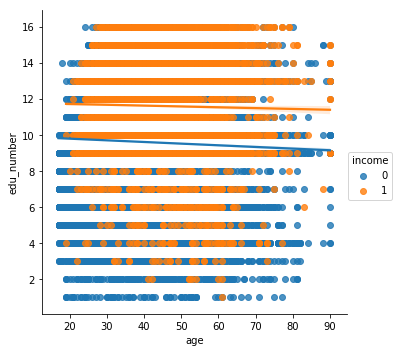

In [32]:
# age+edu_number and income
g = sns.lmplot(x="age", y="edu_number", hue="income",
               truncate=True, size=5, data=data)

Just as hitmap suggested, edu_number and age do influence income, as we can see above, higher education level tend to have more orange dots(more than 50K), and mid_age tend to have more orange dots.

### 3 Prediction:

In [33]:
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score

#### 3.1 Logistic Regression

In [34]:
# prepare feature columns and lable column
Y_train = df_train["income"]
X_train = df_train.drop(labels = ["income"],axis = 1)
Y_test = df_test["income"]
X_test = df_test.drop(labels = ["income"],axis = 1)

In [35]:
# logistic regression
import time
start_time = time.time()
log = LogisticRegression()
log.fit(X_train, Y_train)
c_log = cross_val_score(log, X_train, Y_train, cv=10)
print(c_log.mean())
result = log.predict_proba(X_test)[:]
test_result = np.asarray(Y_test)
log_result = pd.DataFrame(result[:,1])
log_result['Predict'] = log_result[0].map(lambda s: 1 if s >= 0.6  else 0)
log_result['testAnswer'] = pd.DataFrame(test_result)
log_result['Correct'] = np.where((log_result['Predict'] == log_result['testAnswer']), 1, 0)
log_result['Correct'].mean()
log_time = time.time() - start_time

0.787448096531


#### 3.2 Gradient Boost Classifier

In [36]:
# gradient boost
start_time = time.time()
gb=GradientBoostingClassifier()
gb.fit(X_train, Y_train)
c_gb = cross_val_score(gb, X_train, Y_train, cv=10)
print(c_gb.mean())
result = gb.predict_proba(X_test)[:]
test_result = np.asarray(Y_test)
gb_result = pd.DataFrame(result[:,1])
gb_result['Predict'] = gb_result[0].map(lambda s: 1 if s >= 0.6  else 0)
gb_result['testAnswer'] = pd.DataFrame(test_result)
gb_result['Correct'] = np.where((gb_result['Predict'] == gb_result['testAnswer']), 1, 0)
gb_result['Correct'].mean()
gb_time = time.time() - start_time

0.861481769627


#### 3.3 Neural Network Classifier

In [37]:
# nueral network
start_time = time.time()
nn = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(14,7,2), random_state=1)
nn.fit(X_train, Y_train)
c_nn = cross_val_score(nn, X_train, Y_train, cv=10)
print(c_nn.mean())
result = nn.predict_proba(X_test)[:]
test_result = np.asarray(Y_test)
nn_result = pd.DataFrame(result[:,1])
nn_result['Predict'] = nn_result[0].map(lambda s: 1 if s >= 0.6  else 0)
nn_result['testAnswer'] = pd.DataFrame(test_result)
nn_result['Correct'] = np.where((nn_result['Predict'] == nn_result['testAnswer']), 1, 0)
nn_result['Correct'].mean()
nn_time = time.time() - start_time

0.751077525817


#### 3.4 Decision Tree Classifier

In [38]:
# decision tree model
start_time = time.time()
dectree = DecisionTreeClassifier()
dectree.fit(X_train, Y_train)
c_dec = cross_val_score(dectree, X_train, Y_train, cv=10)
print(c_dec.mean())
result = dectree.predict_proba(X_test)[:]
test_result = np.asarray(Y_test)
dec_result = pd.DataFrame(result[:,1])
dec_result['Predict'] = dec_result[0].map(lambda s: 1 if s >= 0.6  else 0)
dec_result['testAnswer'] = pd.DataFrame(test_result)
dec_result['Correct'] = np.where((dec_result['Predict'] == dec_result['testAnswer']), 1, 0)
dec_result['Correct'].mean()
dec_time = time.time() - start_time

0.805219046576


#### 3.5 Naive Bayes Classifier

In [39]:
# naive bayes model
start_time = time.time()
gnb = GaussianNB()
gnb.fit(X_train, Y_train).predict(X_train)
c_gnb =  cross_val_score(gnb, X_train, Y_train, cv=10)
print(c_gnb.mean())
result = gnb.predict_proba(X_test)[:]
test_result = np.asarray(Y_test)
gnb_result = pd.DataFrame(result[:,1])
gnb_result['Predict'] = gnb_result[0].map(lambda s: 1 if s >= 0.6  else 0)
gnb_result['testAnswer'] = pd.DataFrame(test_result)
gnb_result['Correct'] = np.where((gnb_result['Predict'] == gnb_result['testAnswer']), 1, 0)
gnb_result['Correct'].mean()
gnb_time = time.time() - start_time

0.788409920861


#### 3.6 Random Forest Classifier

In [40]:
# random forest model
start_time = time.time()
rf = RandomForestClassifier(n_jobs=2, random_state=1, min_samples_leaf=4, min_samples_split=2)
rf.fit(X_train, Y_train)
c_rf = cross_val_score(rf, X_train, Y_train, cv=10)
print(c_rf.mean())
result = rf.predict_proba(X_test)[:]
test_result = np.asarray(Y_test)
rf_result = pd.DataFrame(result[:,1])
rf_result['Predict'] = rf_result[0].map(lambda s: 1 if s >= 0.6  else 0)
rf_result['testAnswer'] = pd.DataFrame(test_result)
rf_result['Correct'] = np.where((rf_result['Predict'] == rf_result['testAnswer']), 1, 0)
rf_result['Correct'].mean()
rf_time = time.time() - start_time

0.856475863514


#### 3.7 Voting Classifier

In [41]:
# voting 
start_time = time.time()
vt= VotingClassifier(VotingClassifier(estimators=[
         ('lr', log), ('rf', rf), ('gnb', gb)],
         voting='soft'))
vt = LogisticRegression()
vt.fit(X_train, Y_train)
c_vt = cross_val_score(vt, X_train, Y_train, cv=10)
print(c_vt.mean())
result = vt.predict_proba(X_test)[:]
test_result = np.asarray(Y_test)
vt_result = pd.DataFrame(result[:,1])
vt_result['Predict'] = vt_result[0].map(lambda s: 1 if s >= 0.6  else 0)
vt_result['testAnswer'] = pd.DataFrame(test_result)
vt_result['Correct'] = np.where((vt_result['Predict'] == vt_result['testAnswer']), 1, 0)
vt_result['Correct'].mean()
vt_time = time.time() - start_time

0.787448096531


### 4.  Feature importance for Decision Tree and Random Forest

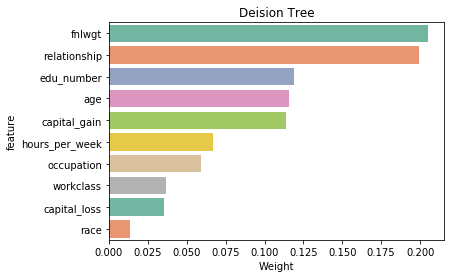

In [42]:
dc_fea = pd.DataFrame(dectree.feature_importances_)
dc_fea["feature"] = list(X_train) 
dc_fea.sort_values(by=0, ascending=False).head()
g = sns.barplot(0,"feature",data = dc_fea.sort_values(by=0, ascending=False)[0:10], palette="Set2",orient = "h")
g.set_xlabel("Weight")
g = g.set_title("Deision Tree")

fnlwgt and relationship are the most imortant feature in decision tree

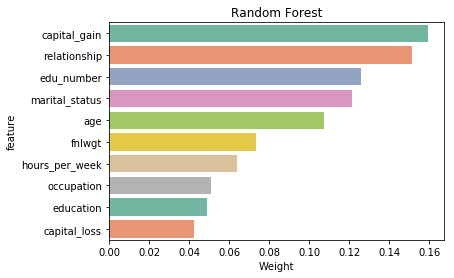

In [43]:
rf_fea = pd.DataFrame(rf.feature_importances_)
rf_fea["feature"] = list(X_train) 
rf_fea.sort_values(by=0, ascending=False).head()
g = sns.barplot(0,"feature",data = rf_fea.sort_values(by=0, ascending=False)[0:10], palette="Set2",orient = "h")
g.set_xlabel("Weight")
g = g.set_title("Random Forest")

capital_gain and relationship are the most important feature in random forest, random forest and decision tree have similar top three features

### 5. Model Comparison

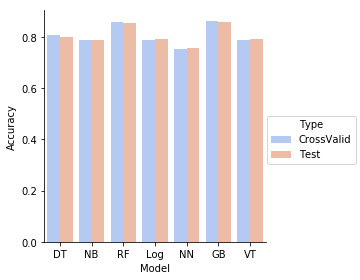

In [44]:
# compare accuracy rate
# cross validation result
cv_means = []
cv_means.append(c_dec.mean())
cv_means.append(c_gnb.mean())
cv_means.append(c_rf.mean())
cv_means.append(c_log.mean())
cv_means.append(c_nn.mean())
cv_means.append(c_gb.mean())
cv_means.append(c_vt.mean())
res1 = pd.DataFrame({"Accuracy":cv_means,"Model":["DT","NB","RF","Log","NN","GB","VT"]})
res1["Type"]= "CrossValid"
# use testing dataset as validation 
tv_means = []
tv_means.append(dec_result['Correct'].mean())
tv_means.append(gnb_result['Correct'].mean())
tv_means.append(rf_result['Correct'].mean())
tv_means.append(log_result['Correct'].mean())
tv_means.append(nn_result['Correct'].mean())
tv_means.append(gb_result['Correct'].mean())
tv_means.append(vt_result['Correct'].mean())
res2 = pd.DataFrame({"Accuracy":tv_means,"Model":["DT","NB","RF","Log","NN","GB","VT"]})
res2['Type'] = "Test";
# combine two valication methods and compare between different models
res = pd.concat([res1,res2])
sns.factorplot(x='Model', y='Accuracy', hue='Type',palette="coolwarm", data=res,size=4, kind='bar')

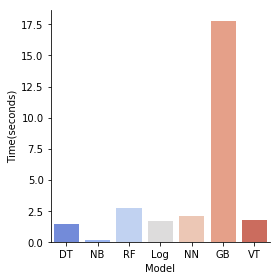

In [45]:
# compare time 
times = []
times.append(dec_time)
times.append(gnb_time)
times.append(rf_time)
times.append(log_time)
times.append(nn_time)
times.append(gb_time)
times.append(vt_time)
res3 = pd.DataFrame({"Time(seconds)":times,"Model":["DT","NB","RF","Log","NN","GB","VT"]})
sns.factorplot(x='Model', y='Time(seconds)', palette="coolwarm", data=res3, kind='bar')

Random Forest and GradientBoosting both have the highest accuracy rate, however, GradientBoosting took more time.<br/> Cross validation and test result are similar among the same model.